This notebook was used to compile all of the available data from the Utah Flux Network stations.  It should only need to be used once, as other notebooks are used to comile the newer data.

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import sys
import pathlib
import glob
import matplotlib.pyplot as plt
from urllib.parse import quote
from sqlalchemy import create_engine
import configparser


import statsmodels.api as sm
#import pingouin as pg
import plotly.express as px

In [2]:

sys.path.append("../../../Micromet")
import micromet
from micromet import AmerifluxDataProcessor
%matplotlib inline

In [3]:
site_folders = {'US-UTD':'Dugout_Ranch',
                'US-UTB':'BSF',
                'US-UTJ':'Bluff',
                'US-UTW':'Wellington',
                'US-UTE':'Escalante',
                'US-UTM':'Matheson',
                'US-UTP':'Phrag',
                'US-CdM':'Cedar_mesa',
                'US-UTV':'Desert_View_Myton',
                'US-UTN':'Juab'
                }


compdf = {}

am = micromet.AmerifluxDataProcessor()

for key, value in site_folders.items():

    print(key)
    raw_fold = pathlib.Path('G:/Shared drives/UGS_Flux/Data_Downloads/')
    raw_data = am.raw_file_compile(raw_fold, value, search_str = "*Flux_AmeriFluxFormat*.dat")
    if raw_data is not None:
        am_data = micromet.Reformatter(raw_data,
                                       config_path="../../data/reformatter_vars.yml", 
                                       drop_soil=False,)
        am_df = am_data.et_data
        compdf[key] = am_df

        am_df.to_csv(f"../../station_data/{key}_HH_{am_df['TIMESTAMP_START'].values[0]:}_{am_df['TIMESTAMP_END'].values[-1]:}.csv")

        
cdf = pd.concat(compdf, axis=0)
cdf.index.set_names(['stationid','datetime_start'],inplace=True)
#cdf.rename(columns={'level_0':'stationid'},inplace=True)
#cdf.to_parquet('../station_data/all_data.parquet')
for col in cdf.columns:
    cdf.rename(columns={col:col.lower()},inplace=True)


US-UTD
US-UTB
US-UTJ
US-UTW
US-UTE
US-UTM


c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:740: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  et_data["datetime_start"] = pd.to_datetime(
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:700: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.et_data.insert(0, col, ncol)
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\.

US-UTP


c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype

US-CdM
US-UTV
US-UTN


c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype

In [4]:
site_folders = {'US-UTD':'Dugout_Ranch',
                'US-UTB':'BSF',
                'US-UTJ':'Bluff',
                'US-UTW':'Wellington',
                'US-UTE':'Escalante',
                'US-UTM':'Matheson',
                'US-UTP':'Phrag',
                'US-CdM':'Cedar_mesa',
                'US-UTV':'Desert_View_Myton',
                'US-UTN':'Juab'
                }


compdf = {}

am = micromet.AmerifluxDataProcessor()

for key, value in site_folders.items():

    print(key)
    raw_fold = pathlib.Path('G:/Shared drives/UGS_Flux/Data_Downloads/')
    raw_data = am.raw_file_compile(raw_fold, value, search_str = "*Statistics_AmeriFlux*.dat")
    if raw_data is not None:
        am_data = micromet.Reformatter(raw_data,
                                       config_path="../../data/reformatter_vars.yml", 
                                       drop_soil=False,
                                       data_type='met'
                                       )
        am_df = am_data.et_data
        compdf[key] = am_df

        #am_df.to_csv(f"../../station_data/{key}_HH_{am_df['TIMESTAMP_START'].values[0]:}_{am_df['TIMESTAMP_END'].values[-1]:}.csv")

        
ddf = pd.concat(compdf, axis=0)
ddf.index.set_names(['stationid','datetime_start'],inplace=True)
#cdf.rename(columns={'level_0':'stationid'},inplace=True)
#cdf.to_parquet('../station_data/all_data.parquet')
for col in ddf.columns:
    ddf.rename(columns={col:col.lower()},inplace=True)


US-UTD
US-UTB
US-UTJ
US-UTW
US-UTE
US-UTM


c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:740: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  et_data["datetime_start"] = pd.to_datetime(
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:700: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.et_data.insert(0, col, ncol)
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\.

US-UTP
US-CdM
US-UTV
US-UTN


In [5]:
soilcols = [col.lower() for col in am_data.MATH_SOILS_V2]
soildfs = pd.merge(ddf,cdf[soilcols],how='left',on=['stationid','datetime_start'],suffixes=(None,'_eddy'))
soildfs

for col in cdf.columns:
    if col in soilcols:
        cdf.drop(columns=col,inplace=True)  # drop the soil columns from the main dataframe

cdf.to_parquet('../../station_data/all_eddy_data.parquet')

soildfs.to_parquet('../../station_data/all_soil_data.parquet')

ddf.to_parquet('../../station_data/all_met_data.parquet')

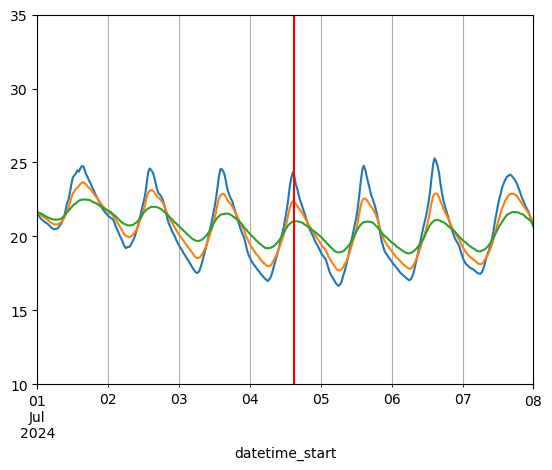

In [30]:
utd_soilt = soildfs.loc['US-UTD'][['ts_3_1_1','ts_3_2_1','ts_3_3_1']].replace(-9999,np.nan)
utd_soilt['ts_3_1_1'].plot()
utd_soilt['ts_3_2_1'].shift(-1).plot()
utd_soilt['ts_3_3_1'].shift(-5).plot()
plt.axvline('2024-07-04 15:00',color='r')
plt.xlim('2024-07-01','2024-07-08')
plt.ylim(10,35)
plt.grid(True, which='minor')

In [32]:
peaks1

array([   31,    44,    78,   102,   126,   146,   148,   155,   174,
         221,   223,   271,   286,   319,   332,   367,   415,   463,
         486,   492,   511,   524,   536,   559,   577,   586,   606,
         632,   654,   683,   685,   699,   704,   723,   726,   732,
         747,   753,   796,   799,   844,   847,   892,   895,   940,
         942,   965,   969,   973,   985,   989,   995,  1001,  1006,
        1011,  1025,  1036,  1038,  1040,  1084,  1088,  1132,  1136,
        1180,  1184,  1213,  1228,  1231,  1245,  1262,  1276,  1280,
        1291,  1293,  1351,  1370,  1374,  1380,  1389,  1394,  1420,
        1427,  1441,  1445,  1453,  1468,  1471,  1500,  1516,  1520,
        1564,  1567,  1588,  1591,  1612,  1616,  1631,  1633,  1644,
        1660,  1663,  1676,  1711,  1760,  1771,  1782,  1805,  1807,
        1838,  1855,  1867,  1874,  1878,  1881,  1886,  1888,  1901,
        1908,  1921,  1930,  1946,  1951,  1997,  1999,  2045,  2047,
        2093,  2095,

In [33]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks


time = utd_soilt.index

series1 = utd_soilt['ts_3_1_1']
series2 = utd_soilt['ts_3_2_1']

peaks1, _ = find_peaks(series1)
peaks2, _ = find_peaks(series2)

# Assuming peaks are regularly spaced, calculate the average time difference
if len(peaks1) > 0 and len(peaks2) > 0:
    # Use only the first few peaks to estimate the offset, assuming regularity
    num_peaks_to_use = min(5, len(peaks1), len(peaks2)) # Use a maximum of 5 peaks
    time_offset_candidates = []
    for i in range(num_peaks_to_use):
        time_offset_candidates.append(time[peaks2[i]] - time[peaks1[i]])
    time_offset = np.mean(time_offset_candidates)
    print(f"Estimated time offset: {time_offset}")
else:
    print("Could not find peaks in one or both series.")

Estimated time offset: 1 days 02:06:00


In [45]:
(time[1]-time[0])

Timedelta('0 days 00:30:00')

In [51]:
correlation = np.correlate(series2, series1, mode='same')
lags = np.arange(-10, 10)
peak_lag_index = np.argmax(correlation)
time_offset_correlation = lags[peak_lag_index] * (time[1] - time[0]).total_seconds()/60
print(f"Estimated time offset using cross-correlation: {time_offset_correlation}")

Estimated time offset using cross-correlation: -300.0


In [36]:
peak_lag_index

np.int64(0)

In [ ]:
cdf = pd.read_parquet('../../station_data/all_eddy_data.parquet')
ddf = pd.read_parquet('../../station_data/all_met_data.parquet')

for col in cdf.columns:
    if col in ddf.columns:
        print(col)


In [ ]:
ddf.head(10).to_clipboard()

In [ ]:
series = ddf.loc['US-UTD','t_si111_body'].replace(-9999,np.nan)
series.plot()
series.diff().plot()
new_series = series[series.diff()<2].diff().cumsum()
new_series.plot()

In [ ]:
config = configparser.ConfigParser()

config.read('../../secrets/config.ini')

from sqlalchemy import create_engine
import urllib.parse
host = config['DEFAULT']['ip']
pw = config['DEFAULT']['pw']
user = config['DEFAULT']['login']

encoded_password = urllib.parse.quote_plus(pw)

def postconn_et(encoded_password, host='localhost',user='postgres',port='5432',db='groundwater', schema = 'groundwater'):
    connection_text = "postgresql+psycopg2://{:}:{:}@{:}:{:}/{:}?gssencmode=disable".format(user,encoded_password,host,port,db)
    return create_engine(connection_text, connect_args={'options': '-csearch_path={}'.format(schema)})


engine = postconn_et(encoded_password, host=host, user=user)

In [ ]:
cdf.to_sql(name = 'amfluxeddy',
           schema='groundwater',
           con=engine,
           if_exists='replace',
           chunksize=2000)